# **Modul 4 Data Mining 2020 "Logistic Regression"**

## **What is the difference between Linear Regression and Logistic Regression?**

Sementara Regresi Linier cocok untuk memperkirakan nilai kontinu (mis. Memperkirakan harga rumah), itu bukan alat terbaik untuk memprediksi kelas dari titik data yang diamati. Untuk memperkirakan kelas suatu titik data, kita memerlukan semacam panduan tentang apa yang akan menjadi kelas **yang paling memungkinkan** untuk titik data tersebut. Untuk itu, kita menggunakan **Logistic Regression**.

**Ingat regresi linier:**

Seperti yang Anda ketahui, Regresi linear menemukan fungsi yang menghubungkan variabel dependen kontinu, $ y $, ke beberapa prediktor (variabel independen $ x_1 $, $ x_2 $, dll.) Misalnya, regresi linier sederhana mengasumsikan fungsi dari:
<br> <br>
$$
y = w_0 + w_1 * x_1 + w_2 * x_2 + ...
$$
<br> <br>
dan menemukan nilai-nilai parameter $ w_0 $, $ w_1 $, $ w_2 $, dll, di mana istilah $ w_0 $ adalah "intersep". Secara umum dapat ditampilkan sebagai:
<br> <br>
$$
ℎ_W (𝑥) = W ^ TX
$$
<br>

Logistic Regression adalah variasi Regresi Linier, berguna ketika variabel dependen yang diamati, $y$, adalah kategorikal. Ini menghasilkan formula yang memprediksi probabilitas label kelas sebagai fungsi dari variabel independen.

Logistic Regression cocok dengan kurva berbentuk S khusus dengan mengambil regresi linier dan mengubah estimasi numerik menjadi probabilitas dengan fungsi berikut, yang disebut fungsi sigmoid 𝜎:

$$
ℎ_W (𝑥) = 𝜎 ({W ^ TX}) = \frac {e ^ {(w_0 + w_1 * x_1 + w_2 * x_2 + ...)}} {1 + e ^ {(θ_0 + w1 * x1 + w2 * x2 + ...)}}
$$
Atau:
$$
P (Y = 1 | X) = 𝜎 ({W ^ TX}) = \frac {e ^ {W ^ TX}} {1 + e ^ {W ^ TX}}
$$

Dalam persamaan ini, $ {W ^ TX} $ adalah hasil regresi (jumlah variabel yang ditimbang oleh koefisien), `exp` adalah fungsi eksponensial dan $ 𝜎 (W ^ TX) $ adalah sigmoid atau [fungsi logistik](http://en.wikipedia.org/wiki/Logistic_function), juga disebut kurva logistik. Ini adalah bentuk "S" yang umum (kurva sigmoid).

Jadi, secara singkat, Logistic Regression melewati input melalui logistik / sigmoid tetapi kemudian memperlakukan hasilnya sebagai probabilitas:

<img
src = "https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width = "400" align = "center">


Tujuan dari algoritma __Logistic Regression__, adalah untuk menemukan parameter terbaik $ W $, untuk $ ℎ_W (𝑥) = 𝜎 ({W ^ TX}) $, sedemikian rupa sehingga model terbaik memprediksi kelas dari setiap kasus.

### **Customer churn with Logistic Regression**

Sebuah perusahaan telekomunikasi prihatin dengan jumlah pelanggan yang meninggalkan bisnis sambungan telepon rumah mereka kepada pesaing yang menggunakan teknologi kabel. Mereka perlu memahami siapa yang akan pergi. Bayangkan Anda adalah seorang analis di perusahaan ini dan Anda harus mencari tahu siapa yang pergi dan mengapa.

### **Pertama import librarinya:**

In [0]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### **About dataset**

Kita akan menggunakan data telekomunikasi untuk memprediksi churn pelanggan. Ini adalah data pelanggan historis di mana setiap baris mewakili satu pelanggan. Data ini relatif mudah dipahami, dan Anda dapat mengungkap wawasan yang dapat Anda gunakan segera. Biasanya lebih murah untuk mempertahankan pelanggan daripada membeli yang baru, jadi fokus analisis ini adalah untuk memprediksi pelanggan yang akan tinggal di perusahaan.

Kumpulan data ini menyediakan info untuk membantu Anda memprediksi perilaku mempertahankan pelanggan. Anda dapat menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan yang terfokus.

Kumpulan data mencakup informasi tentang:

- Pelanggan yang pergi dalam sebulan terakhir - kolom ini disebut Churn
- Layanan yang telah ditandatangani oleh setiap pelanggan - telepon, banyak saluran, internet, keamanan online, cadangan online, perlindungan perangkat, dukungan teknis, dan streaming TV dan film
- Informasi akun pelanggan - berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, penagihan tanpa kertas, biaya bulanan, dan total biaya
- Info demografis tentang pelanggan - jenis kelamin, rentang usia, dan jika mereka memiliki mitra dan tanggungan

### **Download the Telco Churn data**

Telco Churn adalah file data hipotetis yang menyangkut upaya perusahaan telekomunikasi untuk mengurangi turnover di basis pelanggannya. Setiap kasing sesuai dengan pelanggan terpisah dan mencatat berbagai informasi penggunaan layanan dan demografis. Sebelum Anda dapat bekerja dengan data, Anda harus menggunakan URL untuk mendapatkan ChurnData.csv.

Untuk mengunduh data, kami akan menggunakan `!wget` untuk mengunduhnya dari IBM Object Storage.

In [1]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-02-14 12:12:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  --.-KB/s    in 0.01s   

2020-02-14 12:12:11 (2.93 MB/s) - ‘ChurnData.csv’ saved [36144/36144]



### **NOTE:** 
Langkah selanjutnya adalah data preparation. Kita telah membahasnya dimodul sebelumnya kita disini hanya akan menyebutkan step by step data preparation tanpa coding.

**1. Load Data From CSV File**

**2. Data pre-processing and selection**

Mari kita pilih beberapa fitur untuk pemodelan dalam kasus ini kita akan memilih fitur `tenure, age, address, income, ed, employ, equip, callcard, wireless, churn`. 

Kita juga mengubah tipe data target menjadi bilangan bulat, sebab merupakan persyaratan oleh algoritma pembelajaran scikit:

**3. Tentukan X, dan y untuk dataset kita:**

**4. Normalisasi Dataset:**

**5. Splitting Dataset menjadi data train dan test.**

### **Modeling (Logistic Regression with Scikit-learn)**

Mari kita membangun model kita menggunakan __LogisticRegression__ dari paket Scikit-learn. Fungsi ini mengimplementasikan regresi logistik dan dapat menggunakan optimizers numerik yang berbeda untuk menemukan parameter, termasuk ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘sag’, ‘saga’ solver. Anda dapat menemukan informasi lengkap tentang pro dan kontra dari optimizers ini jika Anda mencarinya di internet.

Versi Regresi Logistik dalam Scikit-learn,mendukung regularisasi. Regularisasi adalah teknik yang digunakan untuk memecahkan masalah overfitting dalam model pembelajaran mesin.
__C__ parameter menunjukkan __inverse kekuatan regularisasi__ yang harus menjadi float positif. Nilai yang lebih kecil menentukan regularisasi yang lebih kuat.
Sekarang mari kita muat model kita dengan train set:

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Sekarang kita dapat memprediksi menggunakan set tes kami:

In [0]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

__predict_proba__ mengembalikan taksiran untuk semua kelas, berdasarkan label kelas. Jadi, kolom pertama adalah probabilitas kelas 1, P (Y = 1 | X), dan kolom kedua adalah probabilitas kelas 0, P (Y = 0 | X):

In [0]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.65, 0.35],
       [0.74, 0.26],
       [0.49, 0.51],
       [0.71, 0.29],
       [0.66, 0.34],
       [0.67, 0.33],
       [0.53, 0.47],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.68, 0.32],
       [0.65, 0.35],
       [0.58, 0.42],
       [0.45, 0.55],
       [0.69, 0.31],
       [0.63, 0.37],
       [0.5 , 0.5 ],
       [0.62, 0.38],
       [0.52, 0.48],
       [0.59, 0.41],
       [0.56, 0.44]])

### **Evaluation**

### jaccard index

Mari kita coba indeks jaccard untuk evaluasi akurasi. kita dapat mendefinisikan jaccard sebagai ukuran persimpangan dibagi dengan ukuran penyatuan dua set label. Jika seluruh rangkaian label yang diprediksi untuk sampel benar-benar cocok dengan label yang benar, maka akurasi subsetnya adalah 1,0; jika tidak, itu adalah 0,0.

In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.85

### **confusion matrix**

Cara lain untuk melihat keakuratan classifier adalah dengan melihatnya **confusion matrix.**

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Fungsi ini mencetak dan memplot matriks kebingungan.
    Normalisasi dapat diterapkan dengan mengatur `normalize = True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 2  2]
 [ 1 15]]


Confusion matrix, without normalization
[[ 2  2]
 [ 1 15]]


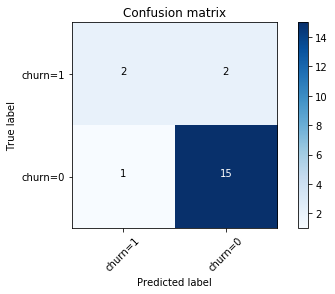

In [0]:
# Hitung confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Lihatlah baris pertama. Baris pertama adalah untuk pelanggan yang nilai churn sebenarnya dalam set tes adalah 1. Seperti yang Anda dapat menghitung, dari 40 pelanggan, nilai churn dari 15 dari mereka adalah 1. Dan dari 15 ini, classifier memprediksi dengan benar 6 dari mereka sebagai 1 dan 9 dari mereka sebagai 0.

Ini berarti, untuk 6 pelanggan, nilai churn yang sebenarnya adalah 1 pada set tes, dan classifier juga dengan benar memprediksi mereka sebagai 1. Namun, sementara label sebenarnya dari 9 pelanggan adalah 1, classifier memperkirakan mereka sebagai 0, yang tidak terlalu baik. Kita dapat menganggapnya sebagai kesalahan model untuk baris pertama.

Bagaimana dengan pelanggan dengan nilai churn 0? Mari kita lihat baris kedua. Sepertinya ada 25 pelanggan yang nilai churnnya 0.

Pengklasifikasi secara benar memprediksi 24 dari mereka sebagai 0, dan salah satunya salah sebagai 1. Jadi, ia telah melakukan pekerjaan yang baik dalam memprediksi pelanggan dengan nilai churn 0. Hal yang baik tentang matriks kebingungan adalah yang menunjukkan kemampuan model untuk secara benar memprediksi atau memisahkan kelas. Dalam kasus spesifik dari penggolong biner, seperti contoh ini, kita dapat menginterpretasikan angka-angka ini sebagai jumlah **true positives, false positives, true negatives, and false negatives.**

In [0]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.67      0.50      0.57         4

    accuracy                           0.85        20
   macro avg       0.77      0.72      0.74        20
weighted avg       0.84      0.85      0.84        20



Berdasarkan hitungan masing-masing bagian,kita dapat menghitung precision dan recall setiap label:


- __Precision__ adalah ukuran accuracy asalkan label kelas telah diprediksi. Ini didefinisikan oleh: presisi = TP / (TP + FP)

- __Recall__ adalah tingkat true positive. Ini didefinisikan sebagai: Ingat = TP / (TP + FN)

    
Jadi, kita bisa menghitung precision dan recall masing-masing kelas.

- __F1 score:__
Sekarang kita berada dalam posisi untuk menghitung skor F1 untuk setiap label berdasarkan precision dan recall label itu.

**F1score** adalah rata-rata harmonik dari precision dan recall, di mana skor F1 mencapai nilai terbaiknya di 1 (precision dan recall sempurna) dan terburuk di 0. Ini adalah cara yang baik untuk menunjukkan bahwa classifier memiliki nilai yang baik untuk kedua precision dan recall.


Dan akhirnya, kita dapat mengetahui akurasi rata-rata untuk pengklasifikasi ini adalah rata-rata skor f1 untuk kedua label, yaitu 0,72 dalam kasus kami.

### **log loss**

Sekarang, mari kita coba __log loss__ untuk evaluasi. Dalam regresi logistik, output bisa menjadi probabilitas pelanggan churn adalah ya (atau sama dengan 1). Probabilitas ini adalah nilai antara 0 dan 1.
Log loss (Logarithmic loss) mengukur kinerja classifier di mana output yang diprediksi adalah nilai probabilitas antara 0 dan 1.

In [0]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5395588837253594